# Read Gaia data

In [1]:
import os, sys
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [2]:
f_train = h5py.File("data/gaia_star_spec.hdf5", "r")

wavelength = f_train['raw']['wavelength'][()]
bp_design_matrices = f_train['raw']['bp_design_matrices'][()]
rp_design_matrices = f_train['raw']['rp_design_matrices'][()]
bp_merge = f_train['raw']['bp_merge'][()]
rp_merge = f_train['raw']['rp_merge'][()]

# Blue Photometer (BP) and Red Photometer (RP) aboard the Gaia spacecraft
# Gaia XP spectra were released as a set of 110 coefficients 
# of an orthogonal basis function expansion of the spectrum, 
# where lower-order coefficients explain large-scale features of the spectra 
# (thus, information like 𝑇eff ) 
# and higher-order coefficients explain small-scale features including the noise.
# The data from each photometer has its own expansion, so there are 55 BP coefficients and 55 RP coefficients.
xp_coeffs_gnorm = f_train['raw']['xp_coeffs_gnorm'][()]
xp_coeffs_gnorm_err = f_train['raw']['xp_coeffs_gnorm_err'][()]

# parallax
parallax = f_train['raw']['parallax'][()] # parallax [mas]
parallax_err = f_train['raw']['parallax_err'][()]

# physical parameters
logg = f_train['raw']['logg'][()] # surface gravity 
logg_err = f_train['raw']['logg_err'][()]
m_h = f_train['raw']['m_h'][()] # metallicity [M/H]
m_h_err = f_train['raw']['m_h_err'][()]
teff = f_train['raw']['teff'][()] # surface temperature [K]
teff_err = f_train['raw']['teff_err'][()]


In [3]:
ith = 1000
bp_coeffs = xp_coeffs_gnorm[ith][:55]
rp_coeffs = xp_coeffs_gnorm[ith][55:]

bp_spec = bp_coeffs.dot(bp_design_matrices)
rp_spec = rp_coeffs.dot(rp_design_matrices)

spec = np.add(np.multiply(bp_spec, bp_merge), np.multiply(rp_spec, rp_merge))

(392.0, 992.0)

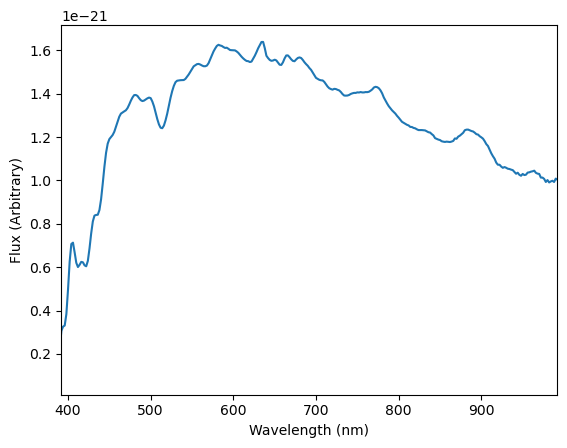

In [4]:
plt.plot(wavelength, spec)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux (Arbitrary)") # Flux normalized by the G-band apparent flux
plt.xlim(392, 992)